In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!cd /kaggle/working && rm -rf Image-based-RL-Manipulation && git clone https://github.com/Pranav-Malpure/Image-based-RL-Manipulation

Cloning into 'Image-based-RL-Manipulation'...
remote: Enumerating objects: 1439, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 1439 (delta 5), reused 7 (delta 2), pack-reused 1429 (from 1)
Receiving objects: 100% (1439/1439), 3.94 MiB | 24.17 MiB/s, done.
Resolving deltas: 100% (340/340), done.


In [3]:
# setup vulkan
!mkdir -p /kaggle/working/usr/share/vulkan/icd.d
!mkdir -p /kaggle/working/usr/share/glvnd/egl_vendor.d

!wget -q https://raw.githubusercontent.com/haosulab/ManiSkill/main/docker/nvidia_icd.json
!wget -q https://raw.githubusercontent.com/haosulab/ManiSkill/main/docker/10_nvidia.json
!mv nvidia_icd.json /kaggle/working/usr/share/vulkan/icd.d
!mv 10_nvidia.json /kaggle/working/usr/share/glvnd/egl_vendor.d/10_nvidia.json
# !mv 10_nvidia.json /usr/share/glvnd/egl_vendor.d/10_nvidia.json
!apt-get install -y --no-install-recommends libvulkan-dev
# dependencies
!pip install --upgrade mani_skill tyro
!pip install hydra-core

!mkdir -p /usr/share/glvnd/
!ln -s /kaggle/working/usr/share/glvnd/egl_vendor.d /usr/share/glvnd/egl_vendor.d
!ln -s /kaggle/working/usr/share/vulkan/icd.d /usr/share/vulkan/icd.d




The following additional packages will be installed:
  libvulkan1
Recommended packages:
  mesa-vulkan-drivers | vulkan-icd
The following NEW packages will be installed:
  libvulkan-dev libvulkan1
0 upgraded, 2 newly installed, 0 to remove and 72 not upgraded.
Need to get 1020 kB of archives.
After this operation, 17.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libvulkan1 amd64 1.3.204.1-2 [128 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libvulkan-dev amd64 1.3.204.1-2 [892 kB]
Fetched 1020 kB in 1s (776 kB/s)
Selecting previously unselected package libvulkan1:amd64.
(Reading database ... 122997 files and directories currently installed.)
Preparing to unpack .../libvulkan1_1.3.204.1-2_amd64.deb ...
Unpacking libvulkan1:amd64 (1.3.204.1-2) ...
Selecting previously unselected package libvulkan-dev:amd64.
Preparing to unpack .../libvulkan-dev_1.3.204.1-2_amd64.deb ...
Unpacking libvulkan-dev:amd64 (1.3.204.1-2) ...
S

In [4]:
!find /usr -name 'libnv_vulkan*'

In [5]:
!apt-get update
!apt-get install -y --no-install-recommends libvulkan-dev vulkan-tools mesa-vulkan-drivers
# !apt-get install -y --no-install-recommends vulkan-utils libvulkan-dev

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1581 B]
Get:2 https://packages.cloud.google.com/apt gcsfuse-focal InRelease [1227 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://packages.cloud.google.com/apt cloud-sdk InRelease [1618 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1269 kB]
Hit:8 https://packages.cloud.google.com/apt google-fast-socket InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:10 https://packages.cloud.google.com/apt gcsfuse-focal/main amd64 Packages [31.6 kB]
Get:11 https://packages.cloud.google.com/apt cloud-sdk/main all Packages [1618 kB]
Get:12 https://packages.cloud.google.com/apt cloud-sdk/main amd64 Packages [3535 kB]
Get:13 http://security.ubuntu.com/ubuntu ja

In [6]:
!export VK_ICD_FILENAMES=/usr/share/vulkan/icd.d/

In [7]:
!vulkaninfo

'DISPLAY' environment variable not set... skipping surface info
error: XDG_RUNTIME_DIR not set in the environment.
error: XDG_RUNTIME_DIR not set in the environment.
error: XDG_RUNTIME_DIR not set in the environment.
error: XDG_RUNTIME_DIR not set in the environment.
error: XDG_RUNTIME_DIR not set in the environment.
VULKANINFO

Vulkan Instance Version: 1.3.204


Instance Extensions: count = 20
	VK_EXT_acquire_drm_display             : extension revision 1
	VK_EXT_acquire_xlib_display            : extension revision 1
	VK_EXT_debug_report                    : extension revision 10
	VK_EXT_debug_utils                     : extension revision 2
	VK_EXT_direct_mode_display             : extension revision 1
	VK_EXT_display_surface_counter         : extension revision 1
	VK_EXT_swapchain_colorspace            : extension revision 4
	VK_KHR_device_group_creation           : extension revision 1
	VK_KHR_display                         : extension revision 23
	VK_KHR_external_fence_capabiliti

In [8]:
!python3 /kaggle/working/Image-based-RL-Manipulation/sac_rgbd_original.py --env_id="PickCube-v1" --obs_mode depth \
  --num_envs=32 --utd=0.5 --buffer_size=300_000 \
  --control-mode="pd_ee_delta_pos" --camera_width=64 --camera_height=64 \
  --total_timesteps=750_000 --eval_freq=10_000

Download complete.
depth start
Saving eval trajectories/videos to runs/PickCube-v1__sac_rgbd_original__1__1737686379/videos
Running training
  0%|                                                | 0/750000 [00:00<?, ?it/s]/opt/conda/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
success_once: 0.00, return: 0.46:   0%|              | 0/750000 [00:07<?, ?it/s]model saved to runs/PickCube-v1__sac_rgbd_original__1__1737686379/ckpt_0.pt
success_once: 0.00, return: 3.74:   1%| | 10048/750000 [05:39<10:43:47, 19.16it/model saved to runs/PickCube-v1__sac_rgbd_original__1__1737686379/ckpt_10048.pt
success_once: 0.00, return: 5.44:   3%| | 20032/750000 [14:30<10:35:29, 19.14it/model saved to runs/PickCube-v1__sac_rgbd_original__1__1737686379/ckpt_20032.pt
success_once: 0.00, return: 5.48:   4%| | 30016/750000 [23:21

In [9]:
pwd

'/kaggle/working'

/opt/conda/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


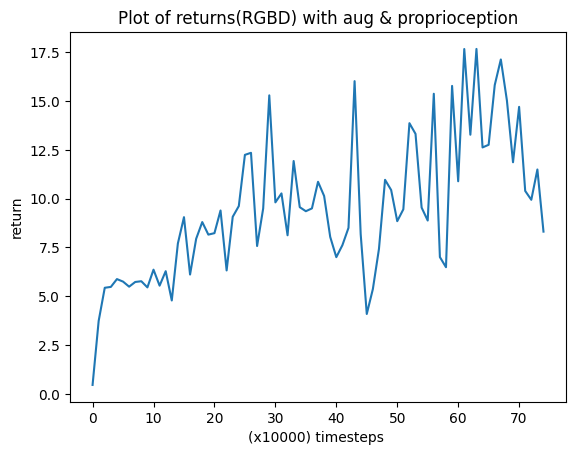

In [10]:
import pickle
import matplotlib.pyplot as plt
import torch
with open('plot_return.pickle', 'rb') as file:
    plot_return = pickle.load(file)

# print(plot_success_once)
plt.plot(torch.tensor(plot_return).cpu().numpy())
plt.xlabel('(x10000) timesteps ')
plt.ylabel('return')
plt.title('Plot of returns(RGBD) with aug & proprioception')
plt.show()